#  Gold Price Prediction

## Objective:
### The goal is to build a predictive model that can accurately forecast future gold prices based on historical and other relevant economic data. This model can help investors and financial analysts make informed decisions by anticipating price trends.

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("gld_price_data (1).csv")

In [5]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# Exploratory Data Analysis (EDA)

In [7]:
# Checking the shape of the dataset
df.shape

(2290, 6)

In [9]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
 # Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [13]:
#Checking for Missing Values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
# Check for duplicate rows
df.duplicated().sum()

0

In [23]:
# Convert the object column to integers
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert a categorical column to integer
df['Date'] = label_encoder.fit_transform(df['Date'])


In [25]:
#recheck columns are in numerical type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   int32  
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 98.5 KB


# Correlation 

In [27]:
correlation=df.corr()

<Axes: >

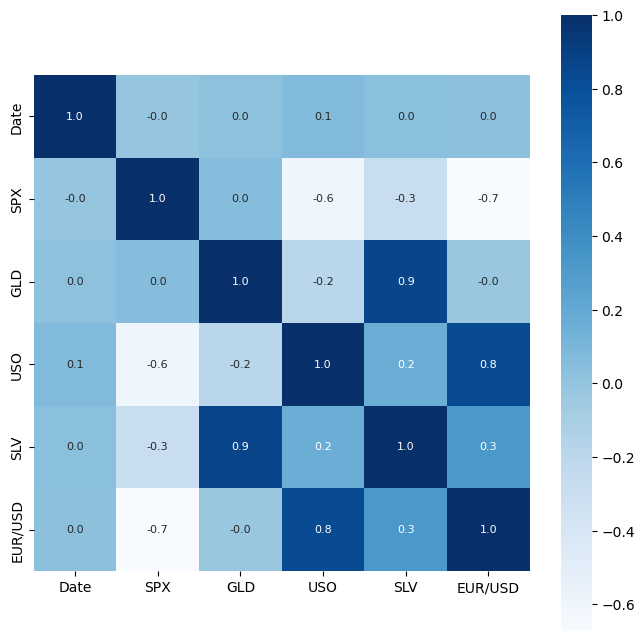

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap='Blues')
#fmt= number of decimal point we want,cmap=color of the map,

In [35]:
print(correlation['GLD'])

Date       0.025020
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: >

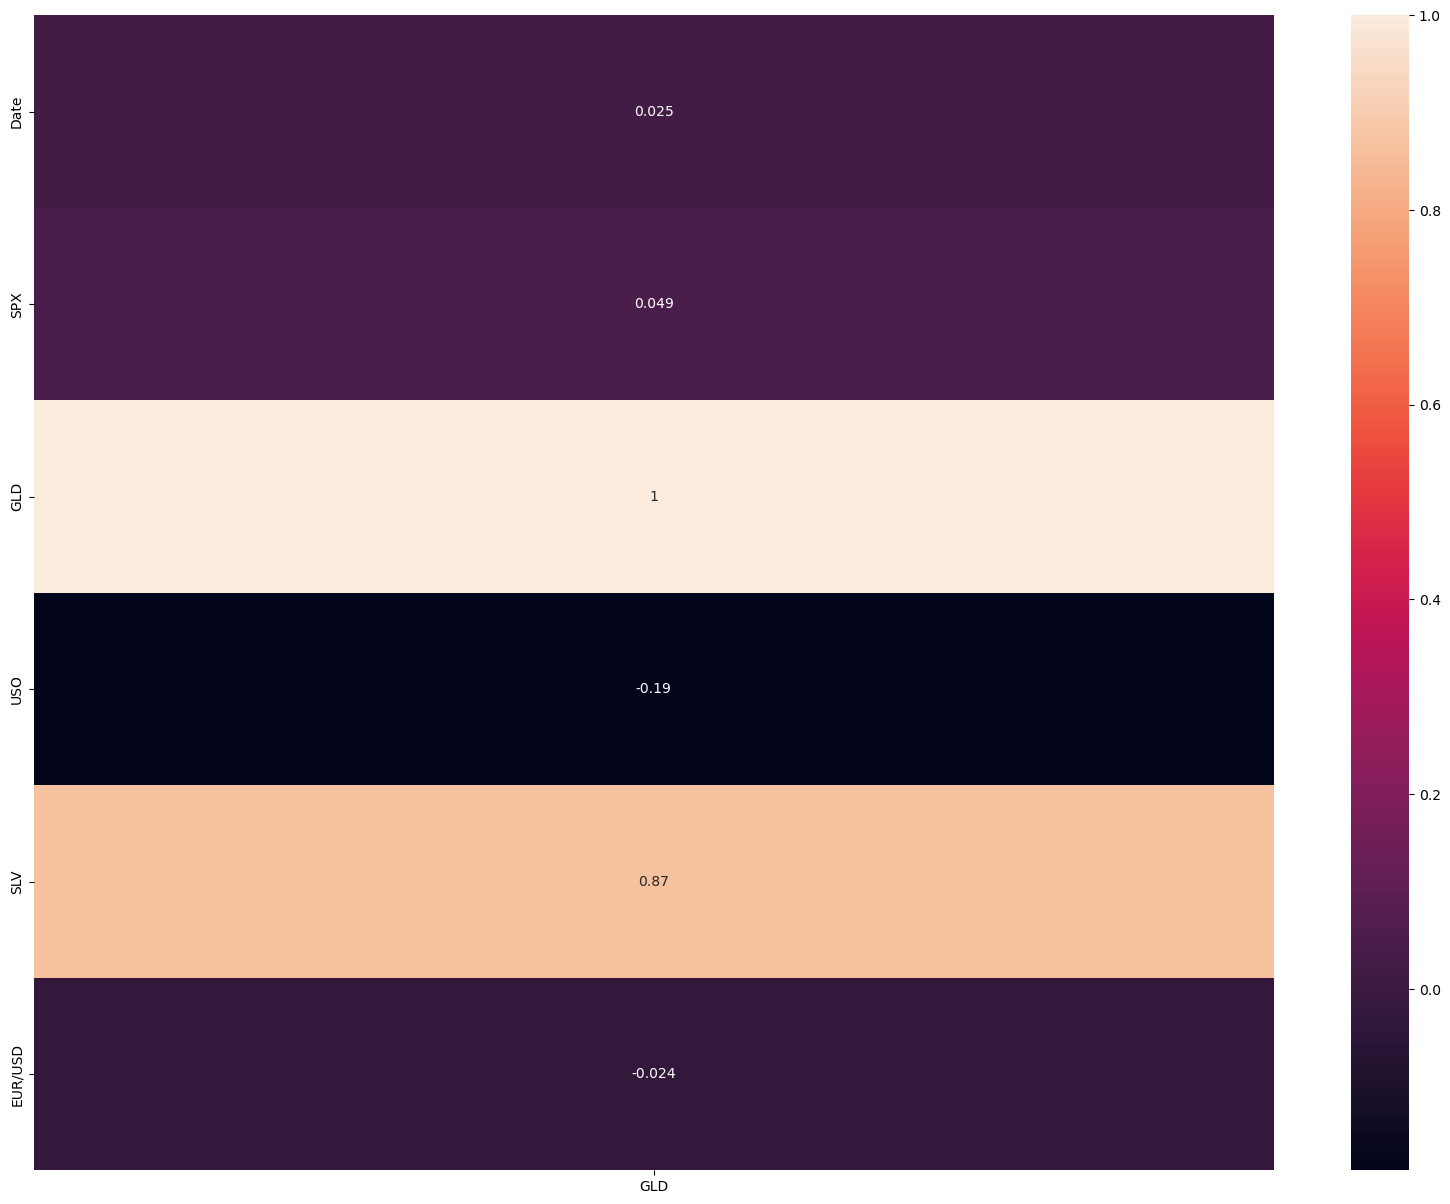

In [39]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation[['GLD']], annot = True)

# Data Splitting

In [41]:
X=df.drop(['GLD','Date'],axis=1)

In [45]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [47]:
y=df['GLD']

In [49]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Train_Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (1832, 4)
X_test shape: (458, 4)
y_train shape: (1832,)
y_test shape: (458,)


# Model Training: Using RandomForest regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
model=RandomForestRegressor(n_estimators=100)

In [83]:
model.fit(X_train,y_train)

RandomForestRegressor()

model evalution

In [86]:
y_prediction=model.predict(X_test)

In [88]:
y_prediction

array([168.80389999,  82.01649982, 116.14450034, 127.6108006 ,
       120.75230094, 154.75239757, 149.94919795, 126.24980034,
       117.40619881, 125.90070059, 116.71410088, 171.41100094,
       142.21629872, 167.75669916, 115.27979996, 117.58580042,
       141.57590224, 170.67980153, 159.74940333, 160.87569907,
       154.98369985, 125.34759985, 175.76669977, 157.69310366,
       125.29190037,  93.68959952,  76.95860027, 120.50040028,
       119.06429906, 167.48520019,  88.27080038, 125.29600027,
        91.09530074, 117.6452005 , 121.109099  , 136.18980106,
       115.40810084, 115.36540084, 145.41750001, 107.54010106,
       104.26700211,  87.0659977 , 126.4050006 , 117.9180998 ,
       153.05659867, 119.63870004, 108.54819985, 108.3284982 ,
        93.08880055, 127.06019802,  75.25090015, 113.75599914,
       121.08930022, 111.24359887, 118.80849886, 120.59639954,
       159.39259865, 168.83450088, 147.18589703,  85.98239891,
        94.42570028,  86.79079868,  90.46609989, 119.06

# Model Evalution

In [94]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [98]:

r2 = r2_score(y_test, y_prediction)
print("R² Score:", r2)

R² Score: 0.9887075422159636


compare actual and predicted values

In [101]:
y_test=list(y_test)

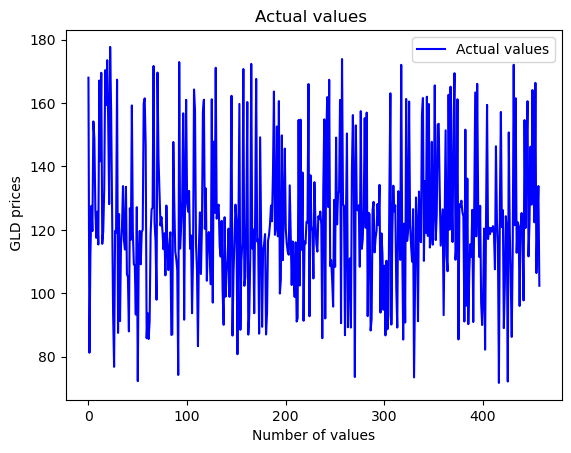

In [105]:
plt.plot(y_test,color='blue', label='Actual values')
plt.title("Actual values ")
plt.xlabel("Number of values")
plt.ylabel(" GLD prices")
plt.legend()
plt.show()

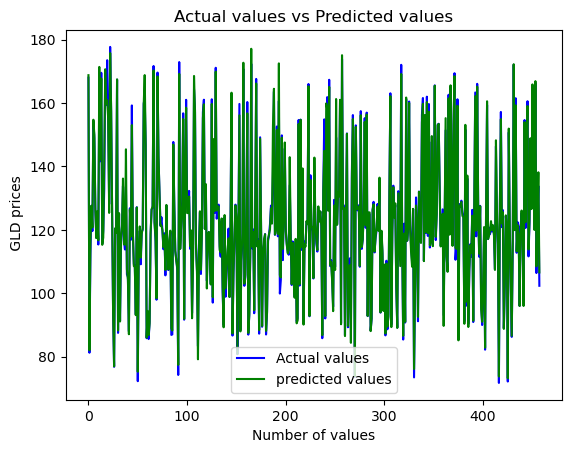

In [107]:
plt.plot(y_test,color='blue', label='Actual values')
plt.plot(y_prediction,color='green',label='predicted values')
plt.title("Actual values vs Predicted values")
plt.xlabel("Number of values")
plt.ylabel(" GLD prices")
plt.legend()
plt.show()

In [109]:
y_pred = model.predict(X_test)          # y_pred = y^ 
# testing and training acc
TestingScore= model.score(X_test, y_test)
TrainingScore= model.score(X_train, y_train)
print("Training Accuracy", model.score(X_train, y_train))
print("Testing Accuracy", model.score(X_test, y_test))

difference = np.abs(TestingScore - TrainingScore)
if difference >0.05:
    print("There is Possibility of underfitting/overfitting")

Training Accuracy 0.9984516626650546
Testing Accuracy 0.9887075422159636


# Prediction 

In [123]:
import numpy as np

# Define your input data
input_data = (1447.160034,	78.470001,	15.1800	,1.471692)  # Provide your input values inside the parentheses

# Convert the input data to a NumPy array
np_array = np.asarray(input_data)

# Reshape the array to have the shape (1, -1) to make it compatible with the model's expected input format
reshape = np_array.reshape(1, -1)

# Use the trained model to make a prediction
pred = model.predict(reshape)

# Print the predicted value
print("Predicted Value:", pred)


Predicted Value: [85.08280003]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1390.189941	:SPX
86.779999	:GLD #predicting value
76.059998	:USO
15.5900	    :SLV
1.557099    :USD

In [125]:
input_data=(1390.189941,	76.059998,	15.5900	,1.557099)
np_array=np.asarray(input_data)
reshape=np_array.reshape(1,-1)
pred=model.predict(reshape)
print('predicted value:',pred)

predicted value: [86.49699912]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
